In [1]:
### Siddharth Chaphekar (Kaggle Username: schaphekar)
### CSC 578-10 Neural Networks and Deep Learning (Online Section)
### Autumn 2019
### Assignment 6

# Importing necessary modules
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Importing required modules for building the Convolutional Neural Network
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# First install CIFAR10 from Keras
from keras.datasets import cifar10

(x_training, y_training), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
# !! DO NOT REMOVE THIS LINE !!
# Delete y_test so that we treat test set as totally held out.
y_test = []

# Defining class names
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [3]:
# After that, we have 3 subsets: train, validation and test.
from sklearn.model_selection import train_test_split

# 80% train, 20% validation, and by stratefied sampling.  
x_train, x_valid, y_train, y_valid = train_test_split(x_training, y_training,
                                                      stratify=y_training, 
                                                      test_size=0.2)

In [4]:
# Obtain the one-hot-vector representation of target (y).
num_classes = 10
 
y_train_bin = keras.utils.to_categorical(y_train, num_classes)
y_valid_bin = keras.utils.to_categorical(y_valid, num_classes)
y_test_bin = keras.utils.to_categorical(y_test, num_classes)

In [5]:
# Scaling the values of the images to range of 0 and 1
x_test = x_test/255.0
x_train = x_train/255.0
x_valid = x_valid/255.0

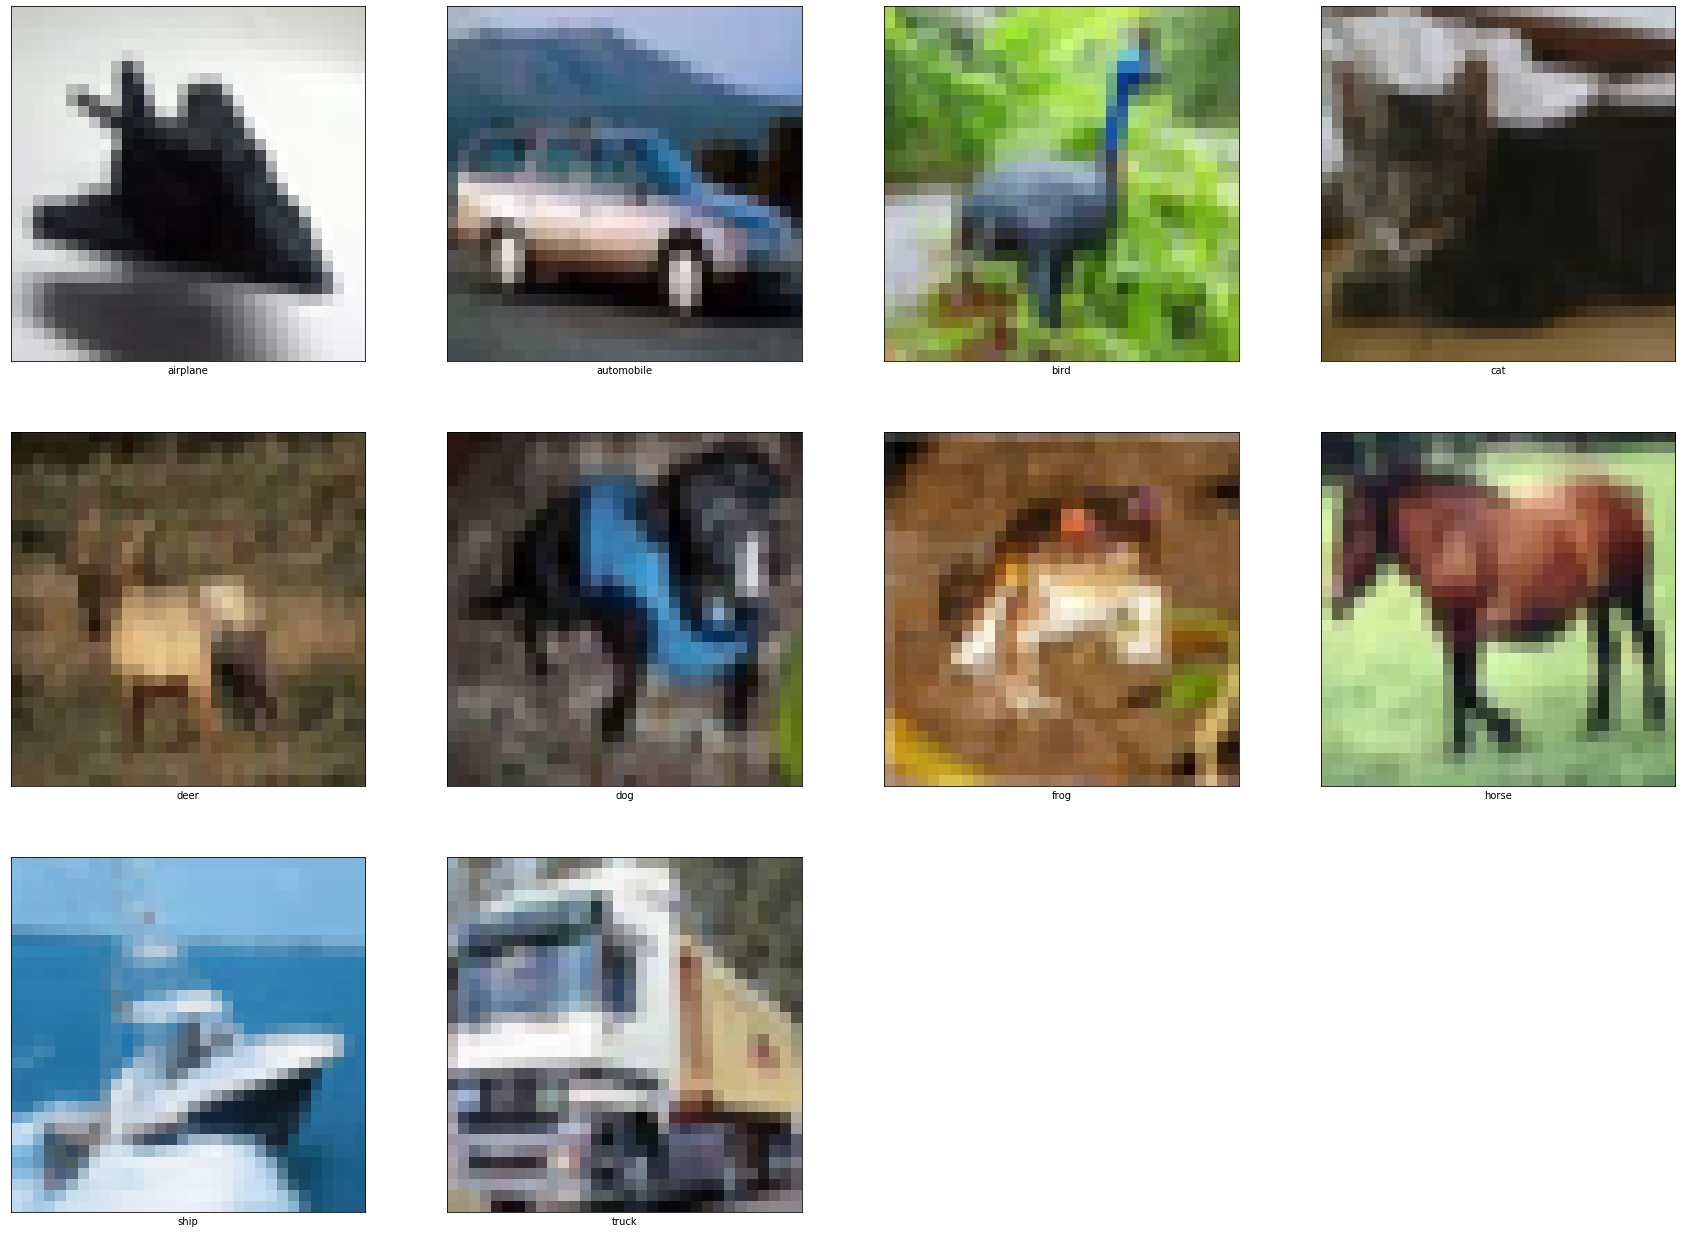

In [6]:
# One image of each class
plt.figure(figsize=(30,30))
for i in range(len(class_names)):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    unique = np.where(y_training[:] == i)[0][0]
    plt.imshow(x_training[unique], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
    plt.grid(False)
plt.show()

In [7]:
# Sequential model is a linear stack of layers
model = keras.Sequential([
    
    # [1st layer] Convolution -- 32 5x5 filters, stride (1,1), activation relu
    keras.layers.Conv2D(32, (1,1), activation='relu', input_shape = (32, 32, 3)),
    keras.layers.Conv2D(32, (1,1), activation='relu'),
    
    # [2nd layer] Max pooling -- size 2x2, stride (2,2)
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Adding dropout to address overfitting
    keras.layers.Dropout(0.3),
    
    # [3rd layer] Convolution -- 32 5x5 filters, stride (1,1), activation relu
    keras.layers.Conv2D(32, (1,1), activation='relu'),
    keras.layers.Conv2D(32, (1,1), activation = 'relu'),
    
    # [4th layer] Max pooling -- size 2x2, stride (2,2)
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Adding dropout to address overfitting
    keras.layers.Dropout(0.3),
    
    # Flattening the previous layer before adding the fully connected layer
    keras.layers.Flatten(),

    # [5th layer] Fully connected (Dense) -- 512 nodes, activation relu
    keras.layers.Dense(512, activation = 'relu'),

    # Adding another dropout layer
    keras.layers.Dropout(0.3),
    
    # [6th layer] Fully connected (Dense) -- 10 nodes, activation softmax
    keras.layers.Dense(10, activation = 'softmax')
   
])

# Summary of model and its layers
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        1056      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        1056      
_________________________________________________________________
conv2d_3 (Conv2D)    

In [8]:
# Compiling baseline model using three parameters
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Fitting the baseline model
model.fit(x_train, y_train_bin, epochs=30, validation_data =(x_valid, y_valid_bin))

Train on 40000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
40000/40000 [==============================] - 91s 2ms/sample - loss: 1.7032 - acc: 0.3846 - val_loss: 1.4912 - val_acc: 0.4682
Epoch 2/30
40000/40000 [==============================] - 92s 2ms/sample - loss: 1.4441 - acc: 0.4844 - val_loss: 1.4211 - val_acc: 0.4912
Epoch 3/30
40000/40000 [==============================] - 169s 4ms/sample - loss: 1.3558 - acc: 0.5171 - val_loss: 1.3059 - val_acc: 0.5443
Epoch 4/30
40000/40000 [==============================] - 137s 3ms/sample - loss: 1.2969 - acc: 0.5364 - val_loss: 1.2601 - val_acc: 0.5617
Epoch 5/30
40000/40000 [==============================] - 148s 4ms/sample - loss: 1.2533 - acc: 0.5524 - val_loss: 1.2401 - val_acc: 0.5638
Epoch 6/30
40000/40000 [==============================] - 179s 4ms/sample - loss: 1.2077 - acc: 0.5699 - val_loss: 1.2526 - val_acc: 0.5556
Epoch 7/30
40000/40000 [==============================] - 142s 4

KeyboardInterrupt: 

In [ ]:
# Output 10000 predictions for Kaggle submission
predictions = model.predict(x_test, verbose=1)
predictions_set = pd.DataFrame(predictions)
predictions_set = predictions_set.reset_index()

# Create output file with classes and probability for each class for each image
predictions_set.columns = ('id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9')
predictions_set['id'] = predictions_set['id'] + 1
predictions_set.to_csv('schaphekar.csv', index=False)